<table style="width:100%">
  <tr>
    <th> <img src="logo_EPM_UNIOVI_CabeceroWEB.gif" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></th>
    <th><font color=brown>Procesamiento de imágenes de Sensores Aerotransportados y Satélite</font>
         </font></th> 
    <th><font color=green>Universidad de Oviedo.                       Ingeniería en Geomática</font>        sgcortes@uniovi.es</th>
  </tr>
</table>

## T12: Segmentación


### 12.2 Umbralización adaptativa
El empleo de un umbral global para toda la imagen puede no ser una buena elección si la imagen tiene un amplio rango dinámico con muy distintas intensidades en zonas diferentes. En el planteamiento adaptativo se calculan umbrales diferentes para pequeñas zonas de la imagen obteniendo en generla mejores resultados.

**cv.AdaptiveThreshold(src, dst, maxValue, adaptive_method=CV_ADAPTIVE_THRESH_MEAN_C, thresholdType=CV_THRESH_BINARY, blockSize=3, param1=5)**

* src - Source 8-bit single-channel image.
* dst - Destination image of the same size and the same type as src.
* maxValue - Non-zero value assigned to the pixels for which the condition is satisfied.
* adaptiveMethod - Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C (hreshold value is the mean of neighbourhood  area) or ADAPTIVE_THRESH_GAUSSIAN_C (threshold value is the weighted sum of neighbourhood values where weights are a gaussian  window). adaptiveMethod decides how thresholding value is calculated.
* thresholdType - Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
* blockSize - size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
* C - Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well. It is just a constant which is subtracted from the mean or weighted mean calculated.


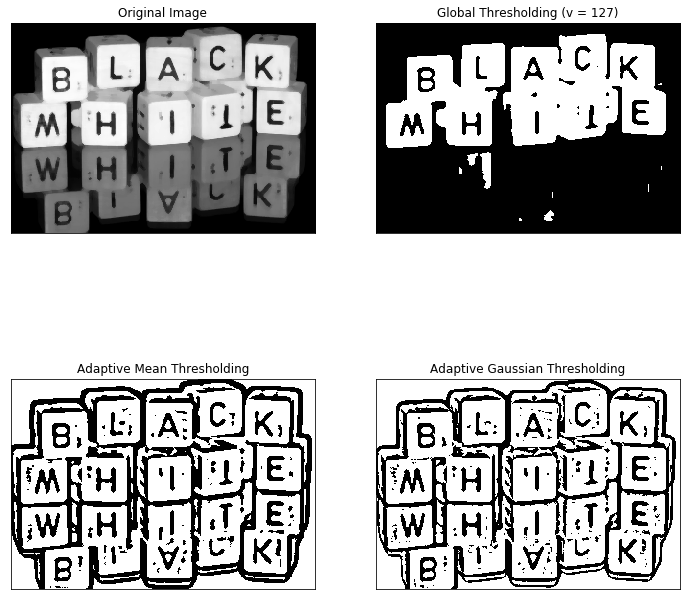

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('bw.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(12,12))
for i in np.arange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 12.3 Método de umbralización de Otsu
El método de Otsu calcula el umbral de la imagen para la binarización de una imagen bimodal de forma automática. Es un procedimiento no paramétrico que selecciona el umbral óptimo maximizando la varianza entre clases mediante una búsqueda exhaustiva. No es un procedimiento adaptativo sino global pero está indicado si la imagen es bimodal y da mejor resutlado si además es ruidosa. (Nobuyuki Otsu, “A threshold selection method from gray-level histogram”, IEEE Transactions on System Man Cybernetics, Vol. SMC-9, No. 1, 1979). Al buscar maximizar la varianza entre dos clases (fondo y primer plano) da mejor resultado en aquellas imágenes que presenten un histograma bimodal.

Se puede elegir este método empleando la misma función **cv2.threshold()** pasando como valor umbral 0 y con el parámetro cv2.THRESH_OTSU. La función devuelve entonces un segundo resutlado **retval** que es el umbral calculado.



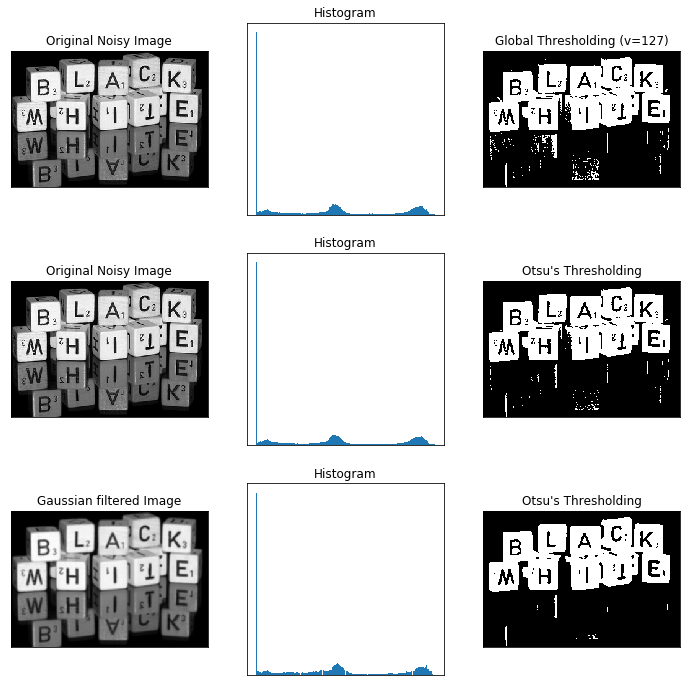

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('bw.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12,12))
for i in np.arange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()